# Pat's Tool for Training the Logistic Regression Models!
Make sure you have a folder called `balanced_set_2` that contains the 3 classes you're interested in looking at
and a folder called `balanced` that contains the two classes you're interested in looking at.

The names of the folders must be the classes you're interested in, and there must be nothing else in the folder except for the folders containing the classes.

In [9]:
# imports
from sklearn.linear_model import LogisticRegression
from skimage import color, io
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import os
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import numpy as np
import matplotlib.pyplot as plt

Training Model 0
Test accuracy: 0.5032909170688898
              precision    recall  f1-score   support

           0       0.46      0.51      0.48      1504
           1       0.58      0.57      0.57      1528
           2       0.47      0.43      0.45      1526

    accuracy                           0.50      4558
   macro avg       0.50      0.50      0.50      4558
weighted avg       0.50      0.50      0.50      4558



/home/patrickpragman/PycharmProjects/smile_tracker/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


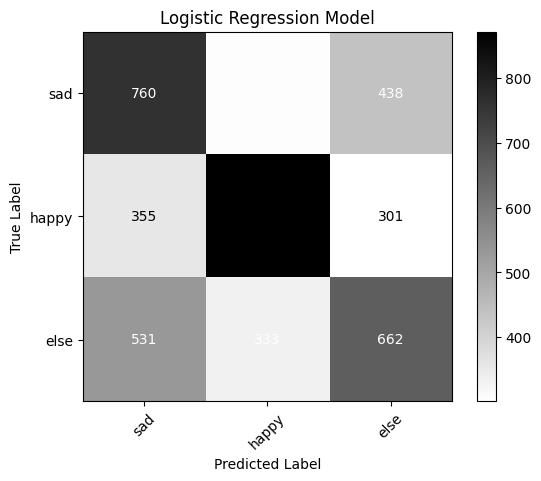

Training Model 1
Test accuracy: 0.6783092324805339
              precision    recall  f1-score   support

           0       0.67      0.69      0.68      2229
           1       0.69      0.67      0.68      2266

    accuracy                           0.68      4495
   macro avg       0.68      0.68      0.68      4495
weighted avg       0.68      0.68      0.68      4495



/home/patrickpragman/PycharmProjects/smile_tracker/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


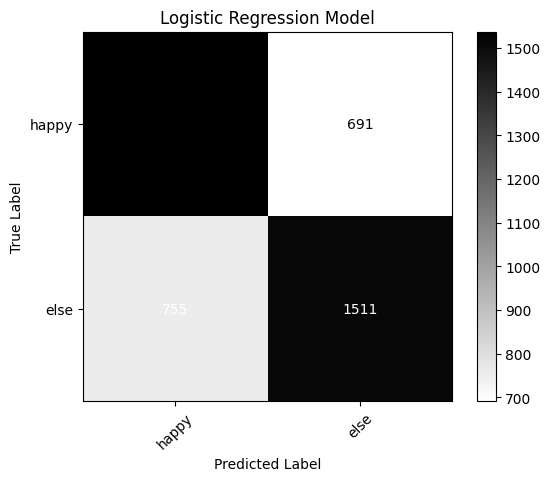

In [10]:
# let's do logistic regression... I'll be kind of non-plussed if this ends up being better
datasets = ["./balanced_set_2/",
            "./balanced/"]

def make_encoder(classes):

    mapping = {}
    for i , class_name in enumerate(classes):
        mapping[class_name] = i

    return lambda s: mapping[s]

for i, data_path in enumerate(datasets):
    print(f"Training Model {i}")
    # variables to hold our data
    data = []
    Y = []
    classifier = LogisticRegression()
    classes = os.listdir(data_path)

    #encoder = make_encoder(os.listdir(data_path))

    mapping = {n: i for i, n in enumerate(classes)}
    demapping = {i: n for i, n in enumerate(classes)}

    encoder = lambda s: mapping[s]
    decoder = lambda i: demapping[i]

    # now walk through and load the data in the containers we constructed above
    for root, dirs, files in os.walk(data_path):
      for file in files:
        if ".JPEG" in file.upper() or ".JPG" in file.upper() or ".PNG" in file.upper():
          key = root.split("/")[-1]
          img = io.imread(f"{root}/{file}", as_gray=True)
          img = resize(img, (48, 48))
          arr = np.asarray(img).reshape(48*48, )  # reshape into an array
          data.append(arr)

          Y.append(encoder(key))  # simple one hot encoding

    y = np.array(Y)
    X = np.array(data)

    # now we've loaded all the X values into a single array
    # and all the Y values into another one, let's do a train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                        random_state=42)  # for consistency

    # now fit the classifier
    # fit the model with data
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    # Evaluate the model on the test set
    print('Test accuracy:', accuracy_score(y_test, y_pred))

    # Evaluation and make a confusion matrix
    print(classification_report(y_test, y_pred))
    confusion_mtx = confusion_matrix(y_test, y_pred)

    plt.imshow(confusion_mtx, cmap='binary', interpolation='nearest')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, [c for c in classes], rotation=45)
    plt.yticks(tick_marks, [c for c in classes])

    thresh = confusion_mtx.max() / 2.
    for j in range(confusion_mtx.shape[0]):
        for k in range(confusion_mtx.shape[1]):
            plt.text(k, j, format(confusion_mtx[j, k]), ha="center", va="center", color="white" if confusion_mtx[i, j] > thresh else "black")

    plt.title('Logistic Regression Model')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # save it
    with open(f"logistic_regression_{i}.pkl", "wb") as file:
      pickle.dump(classifier, file)

